In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import random

In [44]:
data=pd.read_csv('/content/vertebrate.csv', header='infer')

In [45]:
print("Dataset preview:")
print(data.head())

Dataset preview:
     Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0   human             1            1                 0                0   
1  python             0            0                 0                0   
2  salmon             0            0                 1                0   
3   whale             1            1                 1                0   
4    frog             0            0                 1                0   

   Has Legs  Hibernates       Class  
0         1           0     mammals  
1         0           1    reptiles  
2         0           0      fishes  
3         0           0     mammals  
4         1           1  amphibians  


In [46]:
data['Class'] = data['Class'].replace({'reptiles', 'fishes', 'birds', 'amphibians'}, 'non-mammals')

In [47]:
print("\nClass distribution after replacement:")
print(data['Class'].value_counts())


Class distribution after replacement:
Class
non-mammals    10
mammals         5
Name: count, dtype: int64


In [48]:
crosstab = pd.crosstab(index=[data['Warm-blooded'], data['Gives Birth']], columns=data['Class'])


In [49]:
crosstab

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [50]:
X = data.drop(columns=['Name', 'Class'])
y = data['Class']

In [51]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
clf = DecisionTreeClassifier()

In [53]:
clf.fit(trainX, trainY)

DecisionTreeClassifier()

In [54]:
predY = clf.predict(testX)

In [55]:
accuracy = accuracy_score(testY, predY)

In [56]:
print("\nPrediction results:")
print(predY)
print("\nAccuracy of the model:", accuracy)


Prediction results:
['mammals' 'non-mammals' 'mammals' 'non-mammals' 'non-mammals']

Accuracy of the model: 0.8


In [57]:
accuracy

0.8

In [58]:
predY

array(['mammals', 'non-mammals', 'mammals', 'non-mammals', 'non-mammals'],
      dtype=object)

In [59]:
N=1500
mean1=[6,14]
mean2=[10,6]
mean3=[14,14]
cov=[[3.5,0],[0,3.5]]
np.random.seed(50)
X=np.random.multivariate_normal(mean1,cov,int(N/6))
X.shape
X=np.concatenate((X,np.random.multivariate_normal(mean2,cov,int(N/6))))
X.shape
X=np.concatenate((X,np.random.multivariate_normal(mean3,cov,int(N/6))))
X.shape
X=np.concatenate((X,20*np.random.rand(int(N/2),2)))
X.shape
X[0]

array([ 3.0808485 , 13.94204621])

In [60]:
Y=np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))


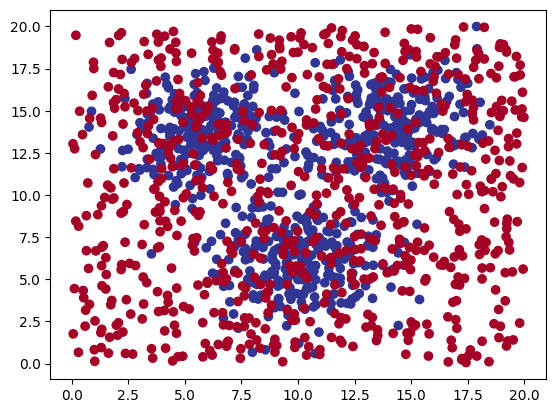

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y, cmap='RdYlBu')
plt.show()


In [62]:
maxDepths=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [63]:
maxDepths

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [64]:
import numpy as np
trainACC=np.zeros(len(maxDepths))

In [65]:
trainACC

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
testACC=np.zeros(len(maxDepths))

In [67]:
testACC

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
index = 0
for depth in maxDepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(trainX, trainY)
    Y_predTrain = clf.predict(trainX)
    Y_predTest = clf.predict(testX)
    trainACC[index] = accuracy_score(trainY, Y_predTrain)
    testACC[index] = accuracy_score(testY, Y_predTest)
    index += 1

In [69]:
testACC

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8])

In [70]:
trainACC

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

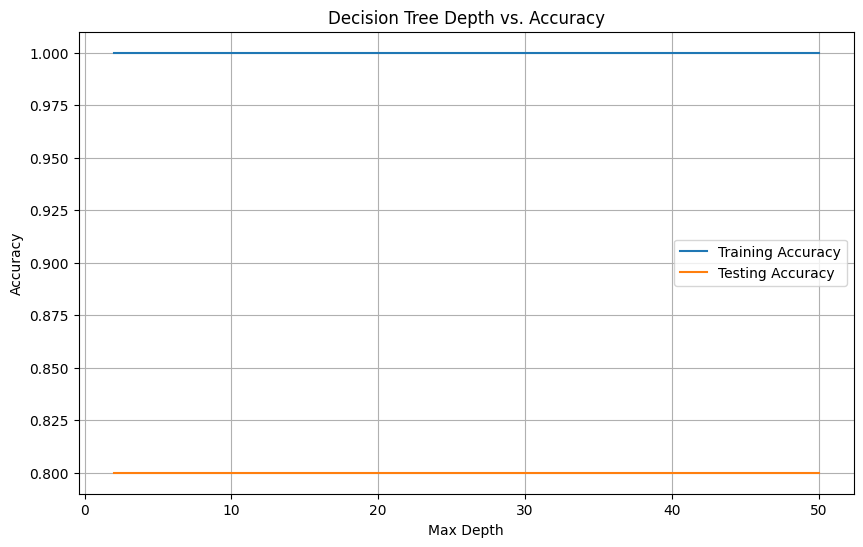

In [71]:

plt.figure(figsize=(10, 6))
plt.plot(maxDepths, trainACC, label='Training Accuracy')
plt.plot(maxDepths, testACC, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Creating synthetic data

In [72]:
from numpy.random import random

In [73]:
%matplotlib inline